In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-analytics-ue-22-cs-342-aa-2-hackathon-2/sample_submission.csv
/kaggle/input/data-analytics-ue-22-cs-342-aa-2-hackathon-2/train.csv
/kaggle/input/data-analytics-ue-22-cs-342-aa-2-hackathon-2/test.csv


In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

In [41]:
train = pd.read_csv("/kaggle/input/data-analytics-ue-22-cs-342-aa-2-hackathon-2/train.csv")
test = pd.read_csv("/kaggle/input/data-analytics-ue-22-cs-342-aa-2-hackathon-2/test.csv")

In [ ]:
train.head()

,timestamp,average_fare,rides_completed,driver_availability,surge_multiplier,vehicle_type,weather,traffic_index,special_event
0,2021-01-01 00:00:00,20.780423,457,49.170948,1.0,bike,Clear,63,0
1,2021-01-01 00:00:00,90.000000,80,30.000000,1.0,car,Clear,53,0
2,2021-01-01 00:00:00,41.197085,239,39.110219,1.0,auto,Clear,35,0
3,2021-01-01 01:00:00,20.772227,141,30.000000,1.5,bike,Stormy,83,0
4,2021-01-01 01:00:00,90.969805,98,30.000000,1.0,car,Clear,26,0


### Task 1: Data Exploration and Preparation (1 mark)

- Conduct exploratory data analysis to identify trends, patterns, and anomalies in fare data for each vehicle type (bikes, autos, and cars) in Quahog City.
- Using appropriate visualizations and techniques, provide an in-depth analysis on the nature of the average fare and other features in the dataset.

In [5]:
# Provides an overview of the train DataFrame

train.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 63015 entries, 0 to 63014

Data columns (total 9 columns):

 #   Column               Non-Null Count  Dtype  

---  ------               --------------  -----  

 0   timestamp            63015 non-null  object 

 1   average_fare         63015 non-null  float64

 2   rides_completed      63015 non-null  int64  

 3   driver_availability  63015 non-null  float64

 4   surge_multiplier     63015 non-null  float64

 5   vehicle_type         63015 non-null  object 

 6   weather              63015 non-null  object 

 7   traffic_index        63015 non-null  int64  

 8   special_event        63015 non-null  int64  

dtypes: float64(3), int64(3), object(3)

memory usage: 4.3+ MB


In [6]:
# Provides a summary of the statistical characterstics of the numerical columns in the train DataFrame

train.describe()

,average_fare,rides_completed,driver_availability,surge_multiplier,traffic_index,special_event
count,63015.000000,63015.000000,63015.000000,63015.000000,63015.000000,63015.000000
mean,70.186256,376.739760,44.695420,1.253939,59.514909,0.100294
std,39.465587,302.994799,15.321958,0.259068,23.152674,0.300393
min,20.000000,10.000000,30.000000,1.000000,20.000000,0.000000
25%,40.000000,146.000000,30.000000,1.000000,39.000000,0.000000
50%,47.554098,287.000000,40.476311,1.215105,59.000000,0.000000
75%,106.082575,550.000000,54.190376,1.400000,80.000000,0.000000
max,161.963018,2614.000000,100.000000,3.400358,99.000000,1.000000


In [7]:
# To check for null columns and duplicate rows in the train DataFrame

null_columns = train.columns[train.isnull().any()]
null_columns

num_duplicates = train.duplicated().sum()
print(num_duplicates)

0


So as we can see, there are no null columns and duplicate rows in the DataFrame


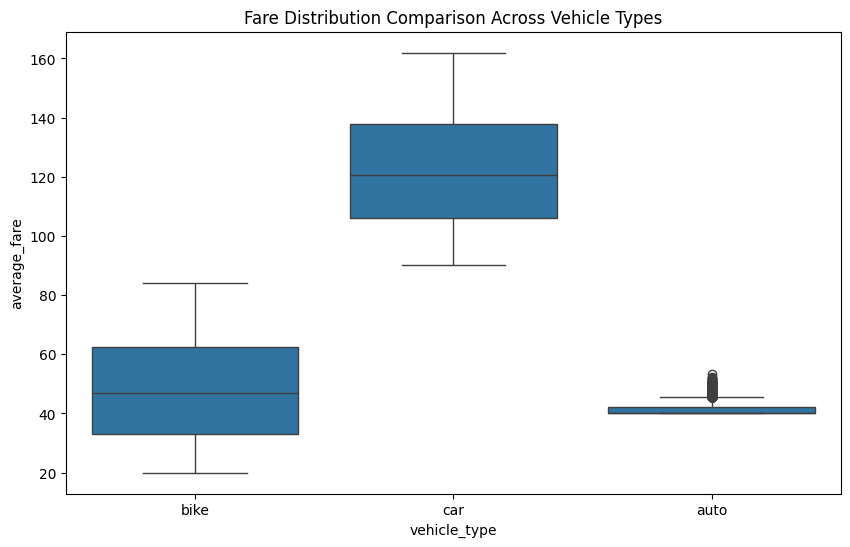

In [8]:
# Box plot to compare the distribution of average_fare across different vehicle types in the train DataFrame

plt.figure(figsize=(10, 6))
sns.boxplot(x='vehicle_type', y='average_fare', data=train)
plt.title('Fare Distribution Comparison Across Vehicle Types')
plt.show()

Inferences from the boxplot used to compare fares across all vehicle types:

1. Fares are more spread out for cars, with a large interquartile range (IQR) compared to bikes and autos, which means there is a larger range in fares charged by cars compared to autos and bikes.
2. Bikes overall have the lowest fares.
3. Car has the highest median fare.
4. There are few outliers for auto's, which indicates that there are instances where the auto fares are much higher than the typical fares.

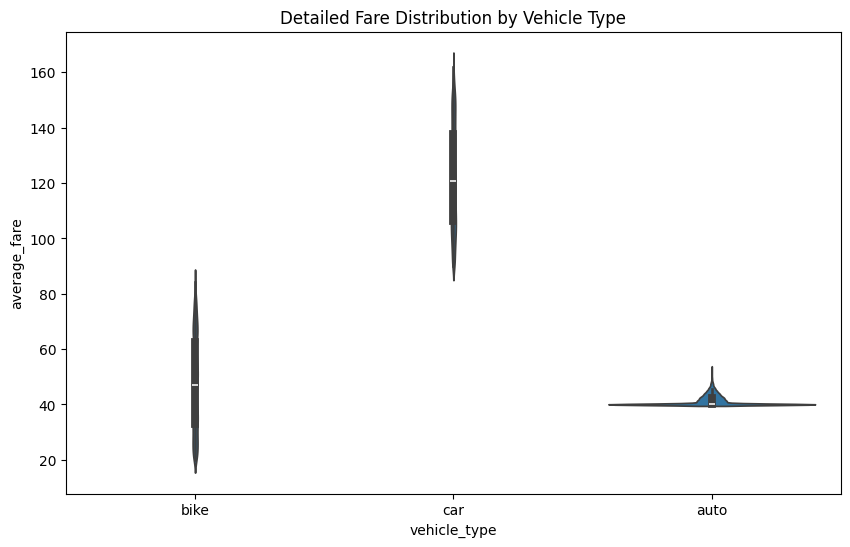

In [9]:
# Violin Plot to compare the distribution of average_fare across different vehicle types in the train DataFrame

plt.figure(figsize=(10, 6))
sns.violinplot(x='vehicle_type', y='average_fare', data=train)
plt.title('Detailed Fare Distribution by Vehicle Type')
plt.show()

Inferences from the violin plot used to compare fares across all vehicle types:

1. From the violin plots we can see that the fares are most spread out for cars.
2. We can also see, similar to the boxplot that cars tend to have the highest median fare.

Lets plot the heatmap of the correlation matrix between the various numeric featues of the dataset so we can see if the traffic index or surge multipliers correlate with higher fares or not 

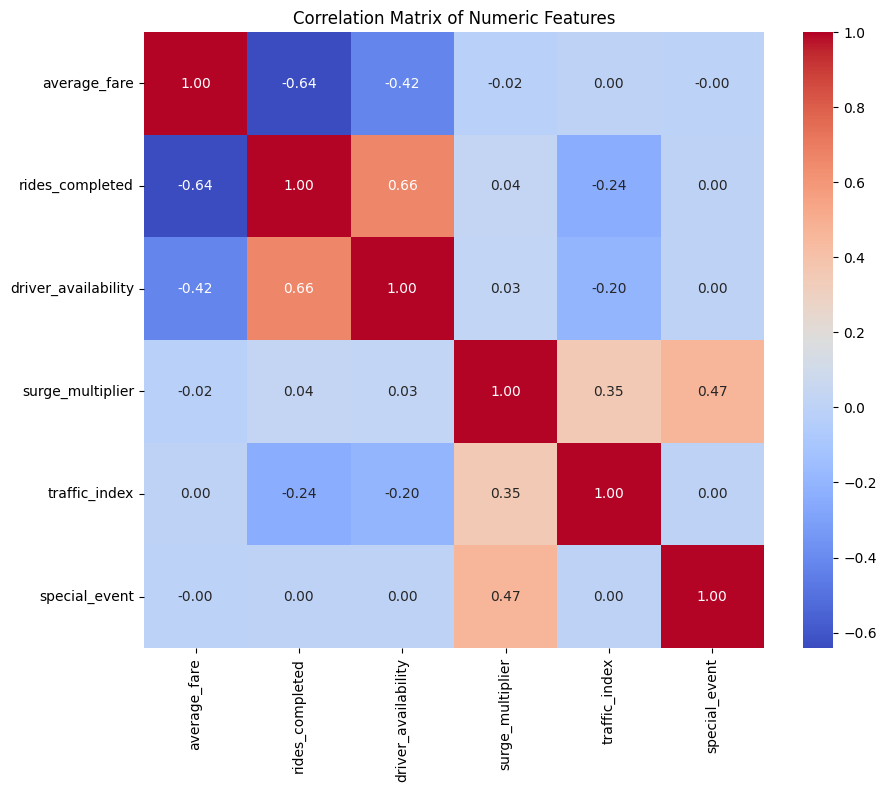

In [10]:
# Heatmap to visualize the correlation matrix of numerical columns in the train DataFrame

numeric_df = train.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

 Average fare decreases as rides completed and driver availability increase, suggesting a supply-demand relationship where higher driver availability or ride volume lowers fares. The surge multiplier is positively influenced by traffic congestion and special events, indicating that RideWave raises prices in response to higher demand or city-wide events.

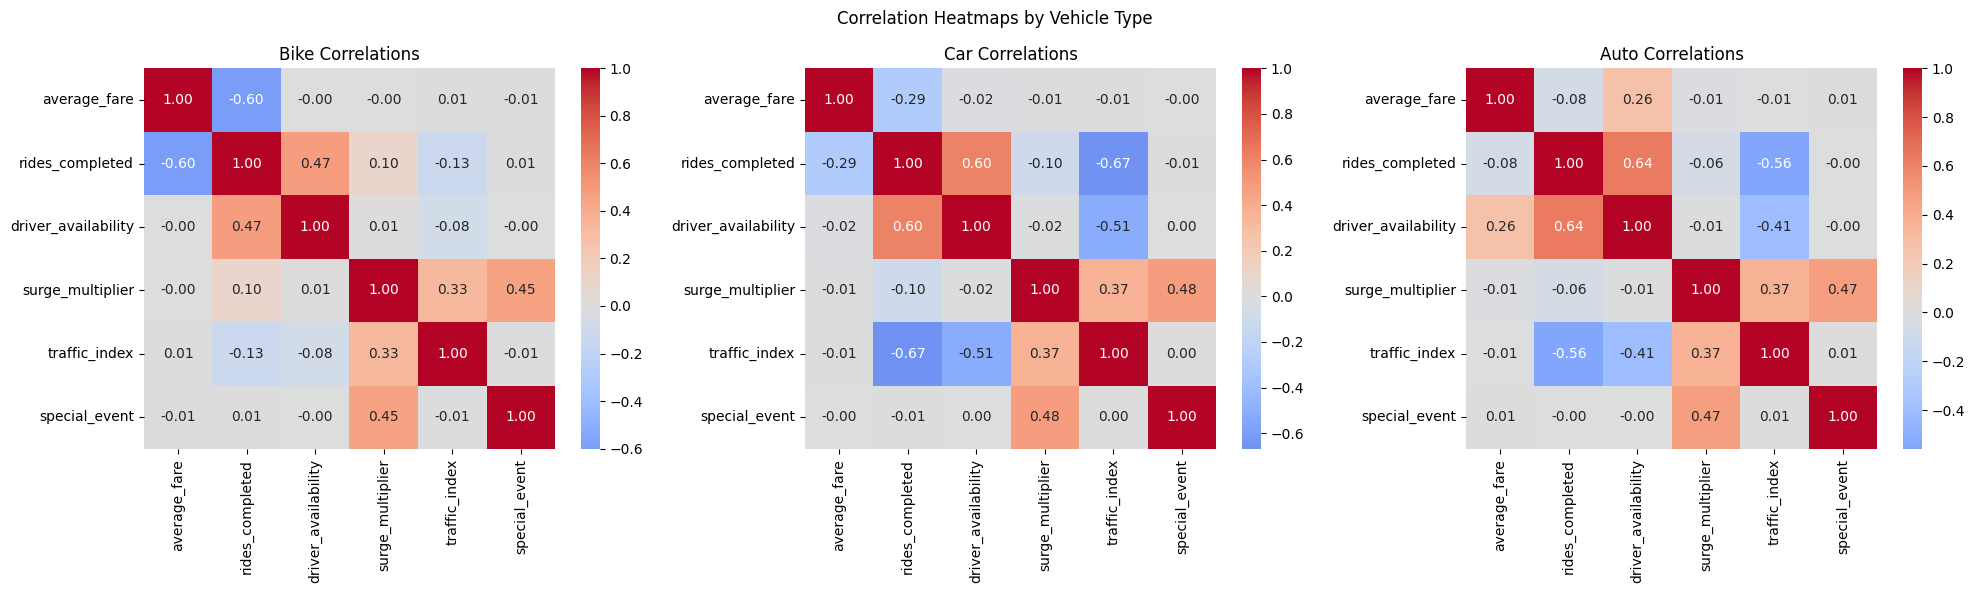

In [11]:
# 3 correlation heatmaps for different vehicle types based on the train DataFrame

biketrain = train[train['vehicle_type'] == 'bike']
cartrain = train[train['vehicle_type'] == 'car']
autotrain = train[train['vehicle_type'] == 'auto']

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Correlation Heatmaps by Vehicle Type')

# For bikes

bike_corr = biketrain.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(bike_corr, annot=True, cmap='coolwarm', center=0, fmt='.2f', ax=axes[0])
axes[0].set_title('Bike Correlations')

# For cars

car_corr = cartrain.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(car_corr, annot=True, cmap='coolwarm', center=0, fmt='.2f', ax=axes[1])
axes[1].set_title('Car Correlations')

#  For autos

auto_corr = autotrain.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(auto_corr, annot=True, cmap='coolwarm', center=0, fmt='.2f', ax=axes[2])
axes[2].set_title('Auto Correlations')


plt.tight_layout()
plt.show()

In [12]:
# Function to print the strongest correlations for each vehicle type

def print_strongest_correlations(corr_matrix, vehicle_type):
    # Get upper triangle of correlations
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    # Stack the correlations and sort
    strongest_corrs = (upper.stack()
                      .sort_values(ascending=False)
                      .round(3))
    
    print(f"\nStrongest correlations for {vehicle_type}:")
    print(strongest_corrs[:5])  # Print top 5 correlations

print_strongest_correlations(bike_corr, "Bikes")
print_strongest_correlations(car_corr, "Cars")
print_strongest_correlations(auto_corr, "Autos")



Strongest correlations for Bikes:

rides_completed      driver_availability    0.474

surge_multiplier     special_event          0.452

                     traffic_index          0.326

rides_completed      surge_multiplier       0.099

driver_availability  surge_multiplier       0.014

dtype: float64



Strongest correlations for Cars:

rides_completed      driver_availability    0.602

surge_multiplier     special_event          0.479

                     traffic_index          0.371

traffic_index        special_event          0.002

driver_availability  special_event          0.001

dtype: float64



Strongest correlations for Autos:

rides_completed   driver_availability    0.640

surge_multiplier  special_event          0.475

                  traffic_index          0.368

average_fare      driver_availability    0.264

                  special_event          0.009

dtype: float64


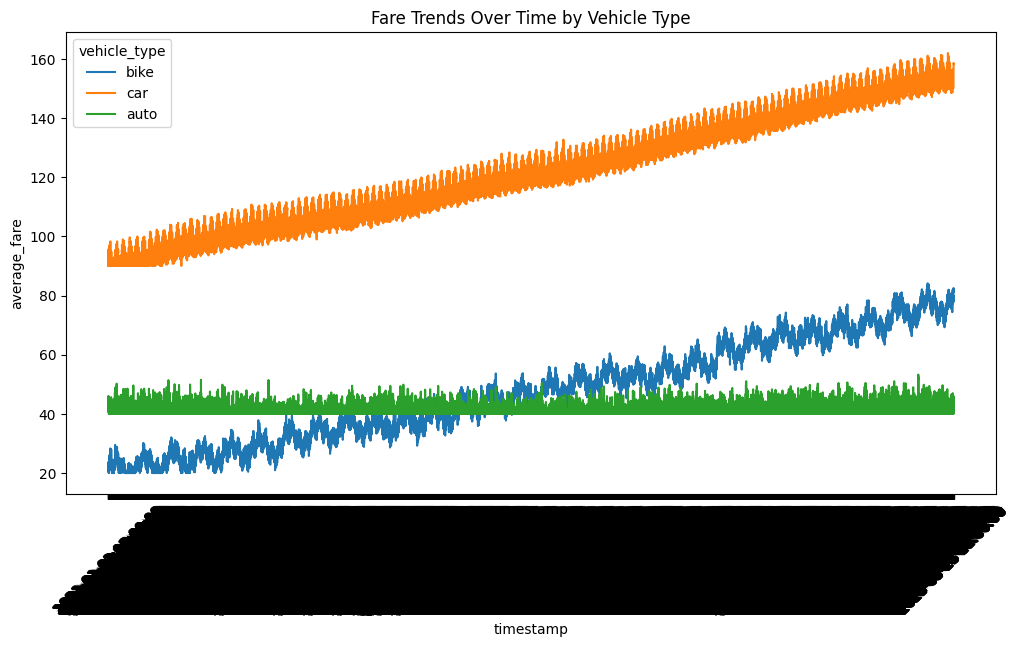

In [13]:
# Line plot to compare the distribution of average_fare among all the vehicle types

plt.figure(figsize=(12, 6))
sns.lineplot(data=train, x='timestamp', y='average_fare', hue='vehicle_type')
plt.title('Fare Trends Over Time by Vehicle Type')
plt.xticks(rotation=45)
plt.show()

Inferences from the line plot for the vehicle types:
1. There is an increase in car fares over time.
2. Due to limited data points for autos, it's difficult to confirm any trends for autos.
3. Same like car fares, there is an increase in bike fares over time.

In [14]:
# Calculate the outliers for the average_fare column in the train DataFrame

def get_outlier_bounds(data):
    Q1 = data['average_fare'].quantile(0.25)
    Q3 = data['average_fare'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

for vehicle_type in ['bike', 'car', 'auto']:
    subset = train[train['vehicle_type'] == vehicle_type]
    lower, upper = get_outlier_bounds(subset)
    outliers = subset[(subset['average_fare'] < lower) | 
                     (subset['average_fare'] > upper)]
    print(f"\nOutliers for {vehicle_type}:")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {(len(outliers)/len(subset)*100):.2f}%")



Outliers for bike:

Number of outliers: 0

Percentage of outliers: 0.00%



Outliers for car:

Number of outliers: 0

Percentage of outliers: 0.00%



Outliers for auto:

Number of outliers: 947

Percentage of outliers: 4.51%


In [15]:
# Key insights about the train DataFrame

print("\nKey Insights:")
print("1. Average Fares:")
print(train.groupby('vehicle_type')['average_fare'].mean().round(2))

print("\n2. Most Common Fare Ranges:")
for vehicle in ['bike', 'car', 'auto']:
    subset = train[train['vehicle_type'] == vehicle]
    mode_range = pd.cut(subset['average_fare'], bins=10).mode()[0]
    print(f"{vehicle}: {mode_range}")

print("\n3. Fare Variability (Standard Deviation):")
print(train.groupby('vehicle_type')['average_fare'].std().round(2))



Key Insights:

1. Average Fares:

vehicle_type

auto     41.31

bike     47.29

car     121.95

Name: average_fare, dtype: float64



2. Most Common Fare Ranges:

bike: (32.825, 39.237]

car: (104.393, 111.589]

auto: (39.987, 41.328]



3. Fare Variability (Standard Deviation):

vehicle_type

auto     1.92

bike    16.84

car     18.65

Name: average_fare, dtype: float64


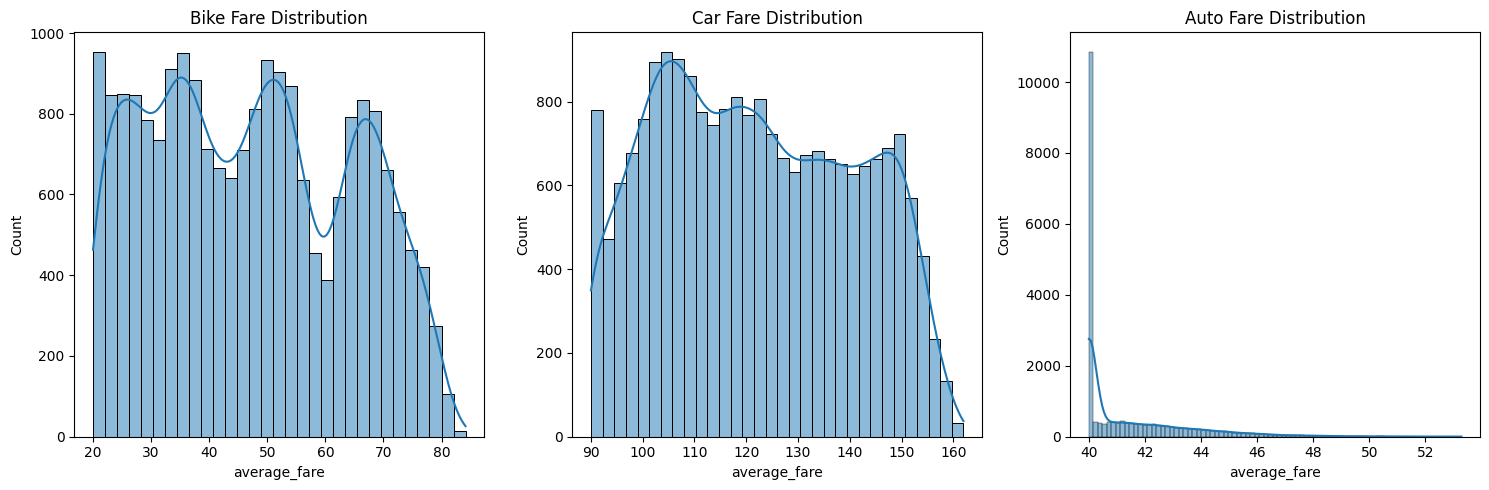

In [16]:
# Histogram to comapare the distribution of average_fare among the different vehicle types

biketrain = train[train['vehicle_type'] == 'bike']
cartrain = train[train['vehicle_type'] == 'car']
autotrain = train[train['vehicle_type'] == 'auto']

plt.figure(figsize=(15, 5))
plt.subplot(131)
sns.histplot(biketrain['average_fare'], kde=True)
plt.title('Bike Fare Distribution')
plt.subplot(132)
sns.histplot(cartrain['average_fare'], kde=True)
plt.title('Car Fare Distribution')
plt.subplot(133)
sns.histplot(autotrain['average_fare'], kde=True)
plt.title('Auto Fare Distribution')
plt.tight_layout()
plt.show()

Inferences from the histograms for each vehicle type:
1. The bike fare distribution appears to be right-skewed with a longer tail towards higher fares.
2. The car fare distribution also appears to be right-skewed, but less than bike fare distribution, but with a more gradual decrease in frequency as fares go higher, which suggests more variability in car fares comapared to bike fares.
3. It's very difficuly to interept the auto fares disctribution because of limited data points, however it appears slightly right-skewed, but we can't draw any strong conclusions.

### Task 2: Time Series Characterization (1 mark)

- Building on your exploratory analysis, examine the time series characteristics of the average fare for each vehicle type in Quahog City.
- Implement the Holt and Holt-Winters methods to model and forecast the average fare for each vehicle type.
- Interpret the results and discuss the implications for RideWave's business.

In [17]:
# Creating 3 seperate DataFrames for each vehicle 

biketrain = train[train['vehicle_type'] == 'bike']
cartrain = train[train['vehicle_type'] == 'car']
autotrain = train[train['vehicle_type'] == 'auto']

In [18]:
# Provides a summary of the statistical characterstics of the numerical columns in the biketrain DataFrame

biketrain.describe()

,average_fare,rides_completed,driver_availability,surge_multiplier,traffic_index,special_event
count,21005.000000,21005.000000,21005.000000,21005.000000,21005.000000,21005.000000
mean,47.293100,554.355725,57.578153,1.269177,59.542109,0.103071
std,16.840520,346.842243,15.931376,0.270503,23.153105,0.304058
min,20.000000,27.000000,30.000000,1.000000,20.000000,0.000000
25%,32.992535,304.000000,45.384424,1.000000,39.000000,0.000000
50%,46.914986,478.000000,57.803355,1.245489,60.000000,0.000000
75%,62.380387,728.000000,69.066926,1.409107,80.000000,0.000000
max,84.124806,2614.000000,100.000000,3.035331,99.000000,1.000000


<Axes: xlabel='average_fare'>

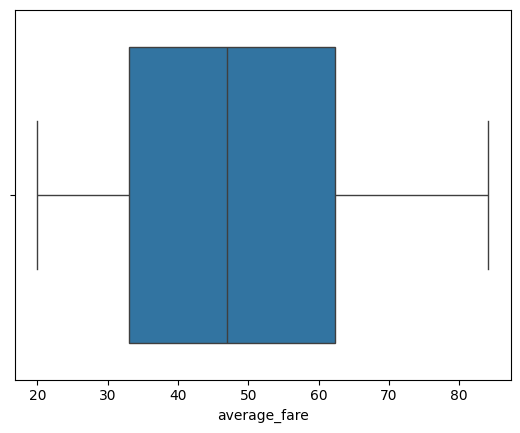

In [19]:
# Create a boxplot that visualizes the distribution of average_fare for bike riders

sns.boxplot(x='average_fare', data=biketrain)

In [20]:
# Provides a summary of the statistical characterstics of the numerical columns in the cartrain DataFrame

cartrain.describe()

,average_fare,rides_completed,driver_availability,surge_multiplier,traffic_index,special_event
count,21005.000000,21005.000000,21005.000000,21005.000000,21005.000000,21005.000000
mean,121.951152,127.209236,34.192322,1.244908,59.508641,0.098691
std,18.654883,74.613174,6.926698,0.251906,23.074362,0.298254
min,90.000000,10.000000,30.000000,1.000000,20.000000,0.000000
25%,106.083041,65.000000,30.000000,1.000000,39.000000,0.000000
50%,120.695550,120.000000,30.000000,1.200000,59.000000,0.000000
75%,137.757531,179.000000,36.478282,1.400000,79.000000,0.000000
max,161.963018,536.000000,82.979793,2.855894,99.000000,1.000000


<Axes: xlabel='average_fare'>

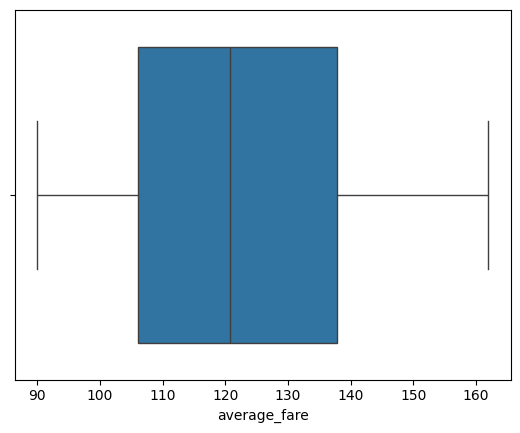

In [21]:
# Create a boxplot that visualizes the distribution of average_fare for car riders

sns.boxplot(x='average_fare', data=cartrain)

In [22]:
# Provides a summary of the statistical characterstics of the numerical columns in the autotrain DataFrame

autotrain.describe()

,average_fare,rides_completed,driver_availability,surge_multiplier,traffic_index,special_event
count,21005.000000,21005.000000,21005.000000,21005.000000,21005.000000,21005.000000
mean,41.314517,448.654320,42.315786,1.247732,59.493978,0.099119
std,1.915105,224.878388,10.980241,0.253720,23.231364,0.298829
min,40.000000,25.000000,30.000000,1.000000,20.000000,0.000000
25%,40.000000,254.000000,32.452745,1.000000,39.000000,0.000000
50%,40.010248,442.000000,40.471087,1.203486,59.000000,0.000000
75%,42.229987,610.000000,49.166031,1.400000,80.000000,0.000000
max,53.282087,1441.000000,97.731776,3.400358,99.000000,1.000000


<Axes: xlabel='average_fare'>

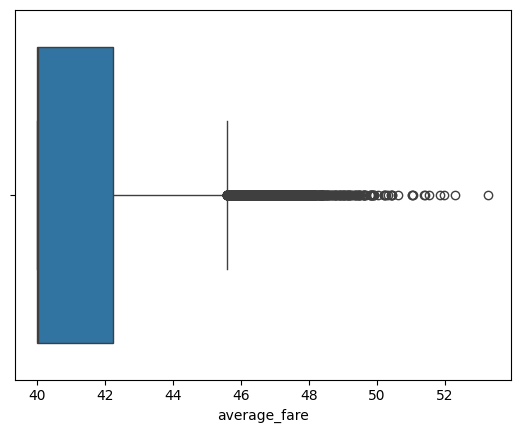

In [23]:
# Create a boxplot that visualizes the distribution of average_fare for auto riders

sns.boxplot(x='average_fare', data=autotrain)

<Axes: title={'center': 'Average Fare for Cars over Time'}>

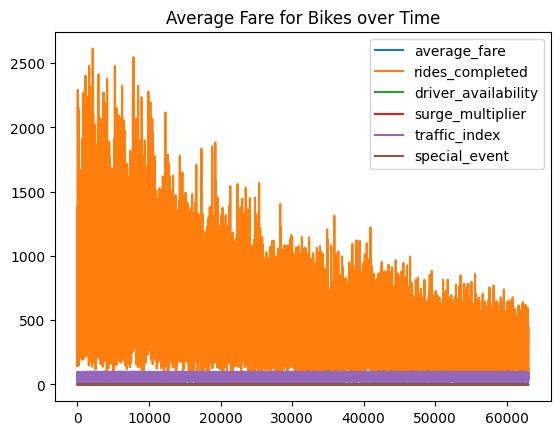

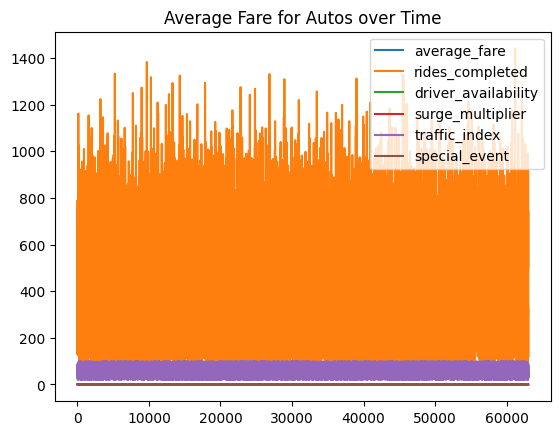

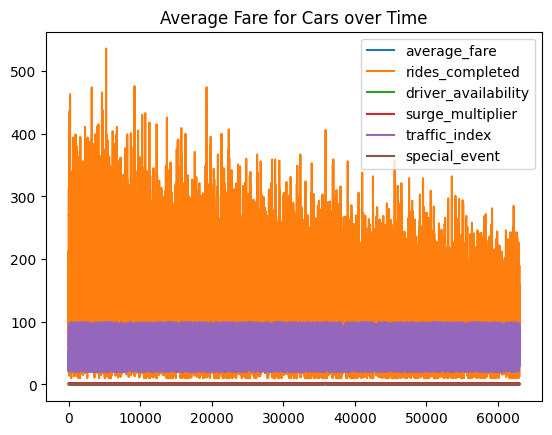

In [24]:
# Plots the average fare for all vehicle typws 

biketrain.plot(title="Average Fare for Bikes over Time")
autotrain.plot(title="Average Fare for Autos over Time")
cartrain.plot(title="Average Fare for Cars over Time")

Now we will apply Holt and Holt-Winters method

In [25]:
# Importing neccessary libraries

from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [26]:
# Creating 3 new dataframes for each vehicle type focussing especially on the average_fare column

biketrain2 = biketrain[['average_fare']]
autotrain2 = autotrain[['average_fare']]
cartrain2 = cartrain[['average_fare']]

In [27]:
# Holt Method

warnings.filterwarnings("ignore")
#Applying holt method to the different vehicle types 
bike_holt = ExponentialSmoothing(biketrain2, trend="add").fit()
bike_forecast_holt = bike_holt.forecast(steps=24)  # Forecast for the next 24 hours
#print(bike_forecast_holt)

auto_holt = ExponentialSmoothing(autotrain2, trend="add").fit()
auto_forecast_holt = auto_holt.forecast(steps=24)
#print(auto_forecast_holt)

car_holt = ExponentialSmoothing(cartrain2, trend="add").fit()
car_forecast_holt = car_holt.forecast(steps=24)
#print(car_forecast_holt)

In [28]:
# Holt-Winters Method

warnings.filterwarnings("ignore")
# Applying the Holt winters method by adding seasonal component also 
bike_holt_winters = ExponentialSmoothing(biketrain2, trend="add", seasonal="add", seasonal_periods=24).fit()
bike_forecast_hw = bike_holt_winters.forecast(steps=24)

auto_holt_winters = ExponentialSmoothing(autotrain2, trend="add", seasonal="add", seasonal_periods=24).fit()
auto_forecast_hw = auto_holt_winters.forecast(steps=24)

car_holt_winters = ExponentialSmoothing(cartrain2, trend="add", seasonal="add", seasonal_periods=24).fit()
car_forecast_hw = car_holt_winters.forecast(steps=24)

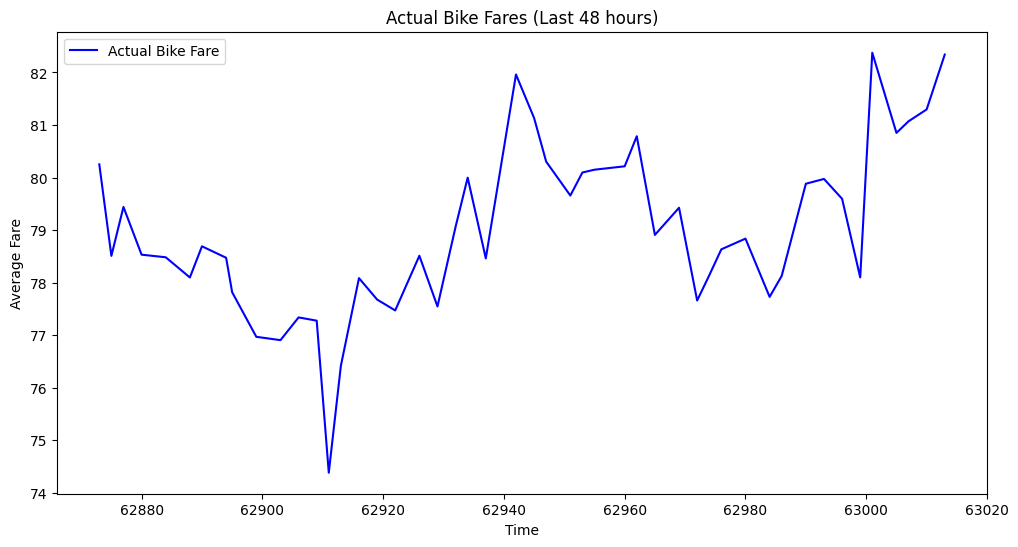

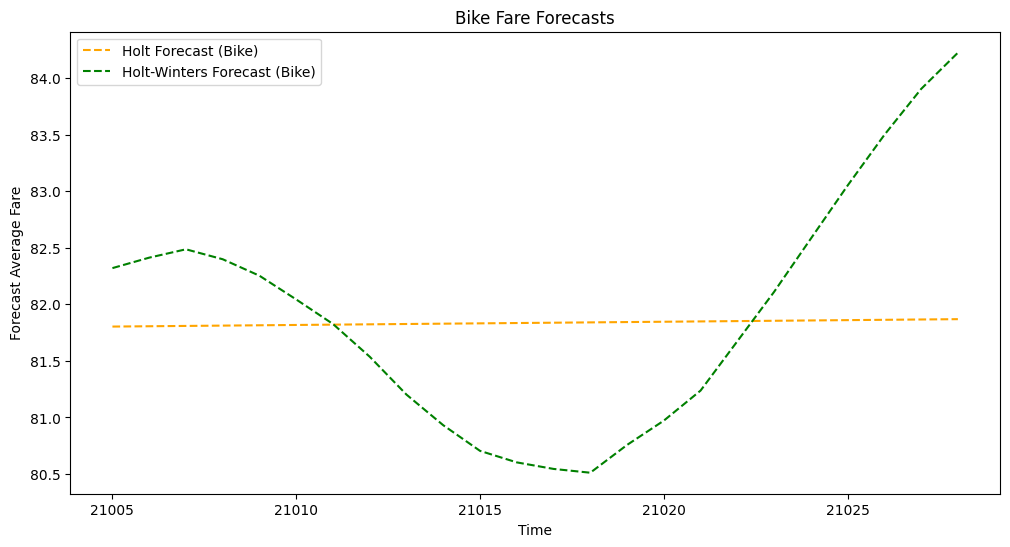

In [29]:
# Plot both the Holt and the Holt Winters method to see which model better captures the fare patterns

# plt.figure(figsize=(12, 6))

# plt.plot(bike_forecast_holt, label="Holt Forecast (Bike)", linestyle="--")
# plt.plot(bike_forecast_hw, label="Holt-Winters Forecast (Bike)", linestyle="--")
# #plt.plot(biketrain2, label="Actual Bike Fare")
# plt.title("Bike Fare Forecasts")
# plt.legend()
# plt.show()

# Plot for Actual Bike Fares
plt.figure(figsize=(12, 6))
plt.plot(biketrain2.index[-48:], biketrain2['average_fare'].values[-48:], label="Actual Bike Fare", color='blue')
plt.title("Actual Bike Fares (Last 48 hours)")
plt.xlabel("Time")
plt.ylabel("Average Fare")
plt.legend()
plt.show()

# Plot for Forecasts
plt.figure(figsize=(12, 6))
plt.plot(bike_forecast_holt.index, bike_forecast_holt, label="Holt Forecast (Bike)", linestyle="--", color='orange')
plt.plot(bike_forecast_hw.index, bike_forecast_hw, label="Holt-Winters Forecast (Bike)", linestyle="--", color='green')
plt.title("Bike Fare Forecasts")
plt.xlabel("Time")
plt.ylabel("Forecast Average Fare")
plt.legend()
plt.show()


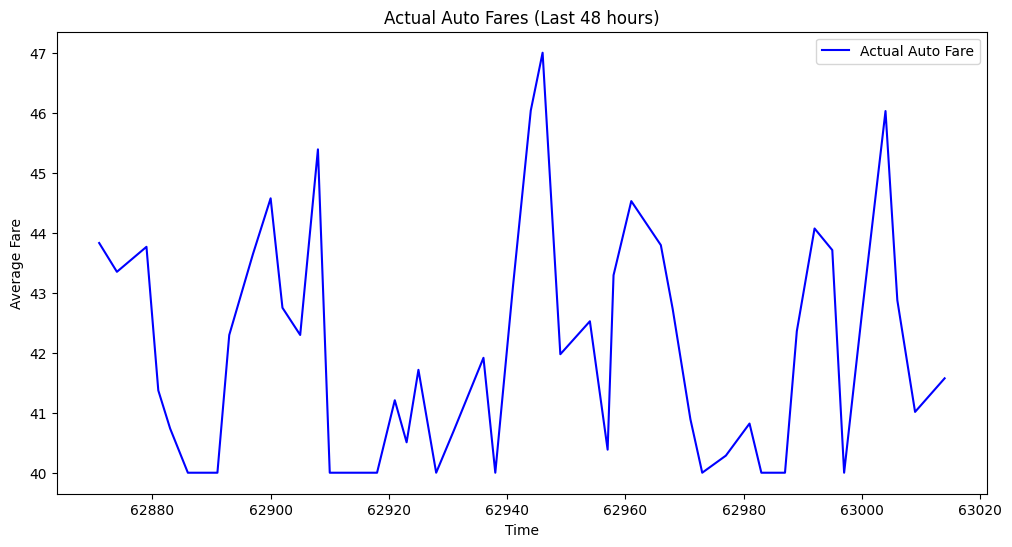

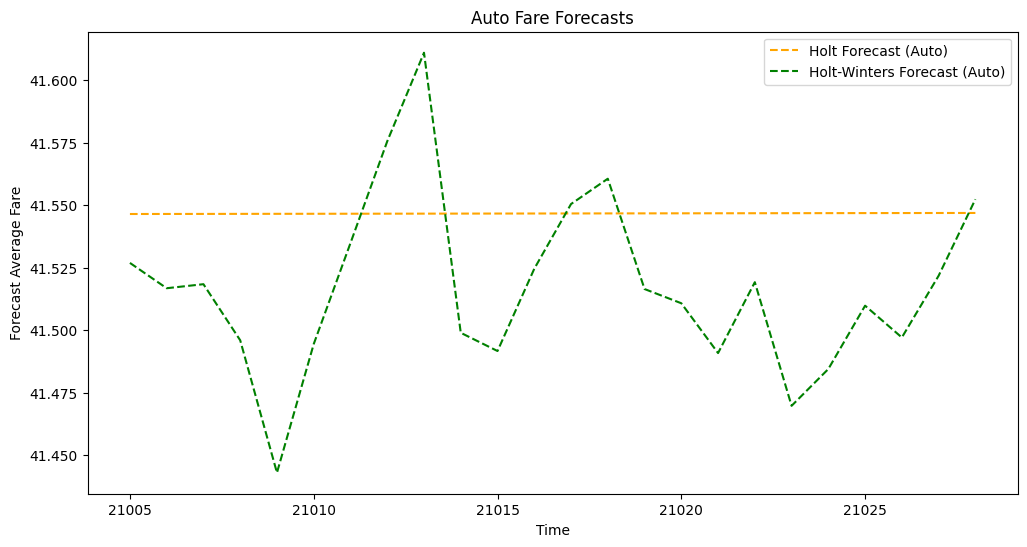

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(autotrain2.index[-48:], autotrain2['average_fare'].values[-48:], label="Actual Auto Fare", color='blue')
plt.title("Actual Auto Fares (Last 48 hours)")
plt.xlabel("Time")
plt.ylabel("Average Fare")
plt.legend()
plt.show()

# Plot for Forecasts
plt.figure(figsize=(12, 6))
plt.plot(auto_forecast_holt.index, auto_forecast_holt, label="Holt Forecast (Auto)", linestyle="--", color='orange')
plt.plot(auto_forecast_hw.index, auto_forecast_hw, label="Holt-Winters Forecast (Auto)", linestyle="--", color='green')
plt.title("Auto Fare Forecasts")
plt.xlabel("Time")
plt.ylabel("Forecast Average Fare")
plt.legend()
plt.show()

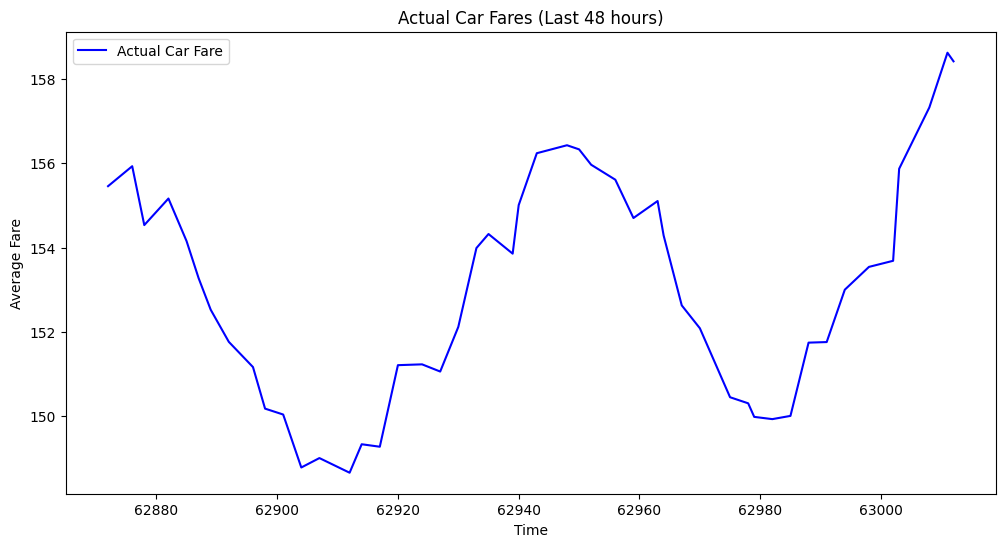

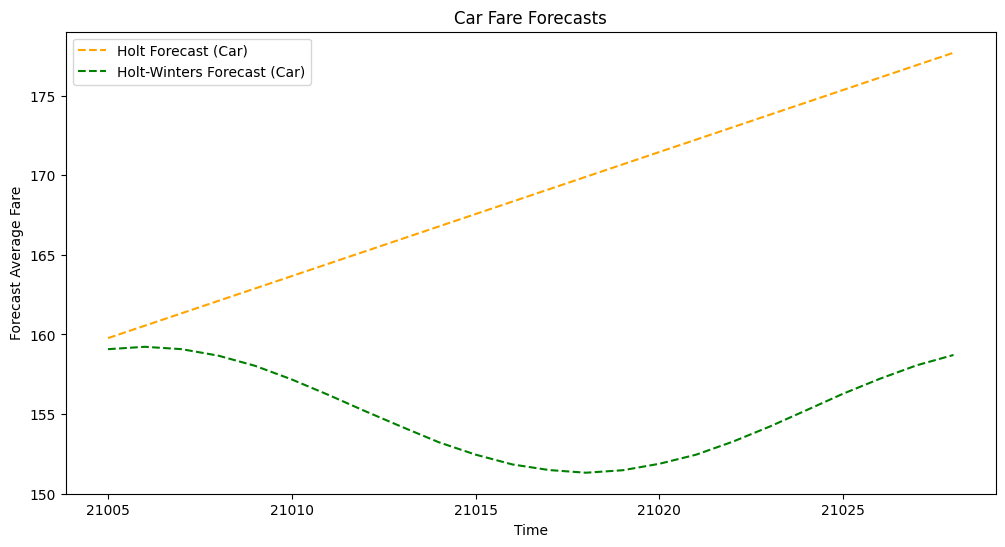

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(cartrain2.index[-48:], cartrain2['average_fare'].values[-48:], label="Actual Car Fare", color='blue')
plt.title("Actual Car Fares (Last 48 hours)")
plt.xlabel("Time")
plt.ylabel("Average Fare")
plt.legend()
plt.show()

# Plot for Forecasts
plt.figure(figsize=(12, 6))
plt.plot(car_forecast_holt.index, car_forecast_holt, label="Holt Forecast (Car)", linestyle="--", color='orange')
plt.plot(car_forecast_hw.index, car_forecast_hw, label="Holt-Winters Forecast (Car)", linestyle="--", color='green')
plt.title("Car Fare Forecasts")
plt.xlabel("Time")
plt.ylabel("Forecast Average Fare")
plt.legend()
plt.show()

So as we can see cars have the highest fare value but with most stable pricing.   
Autos have lowest fare value with moderate volatility and bikes have medium fare value with highest volatility.  

Bike forecast suggests overall growth potential.  
For cars Holt predicts strong upward trend while Holt-Winters suggests a dip before recovery  

So for Ridewaves buisness:  
we can focus on car service for stable revenue due to higher fares and lower volatility.  
Also can use autos and bikes for market expansion and price sensitive customers. We can consider promoting different services at different times of day based on their volatility patterns.

### Task 3: Advanced Forecasting and Feature Engineering (1 mark)

Leveraging insights from Tasks 1 and 2, develop more sophisticated time series models to forecast future average fares for each vehicle type.
- Implement at least one advanced forecasting method (e.g., ARIMA/ARIMAX, SARIMA/SARIMAX, or another technique of your choice).
- Perform feature engineering to incorporate additional relevant variables beyond just the time component to enhance your fare predictions.
- After completing your feature engineering process, list and explain the top 3 most influential features that affect fare predictions, supported by appropriate metrics or visualizations.
- Explain your choice of forecasting method and the rationale behind your feature engineering process.
- Interpret your model results and fare forecasts, relating them to RideWave's operations and the dynamics of fare pricing across different vehicle types.

In [ ]:
# Converting categorical values in the weather column of biketrain DataFrame to numerical values 

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

biketrain['weather_encoded'] = le.fit_transform(biketrain['weather'])

In [33]:
# Dropping the weather column as it's not needed

biketrain.drop("weather", axis=1, inplace=True)

In [34]:
# Converts the timestamp column in biketrain DataFrame to datetime format 
# and extracts hour from each timestamp, storing it in a new column called hour

biketrain['timestamp'] = pd.to_datetime(biketrain['timestamp'])
biketrain['hour'] = biketrain['timestamp'].dt.hour
biketrain

,timestamp,average_fare,rides_completed,driver_availability,surge_multiplier,vehicle_type,traffic_index,special_event,weather_encoded,hour
0,2021-01-01 00:00:00,20.780423,457,49.170948,1.0,bike,63,0,0,0
3,2021-01-01 01:00:00,20.772227,141,30.000000,1.5,bike,83,0,3,1
6,2021-01-01 02:00:00,21.860998,519,47.970585,1.0,bike,26,0,1,2
9,2021-01-01 03:00:00,22.984324,657,57.931034,1.0,bike,29,0,0,3
14,2021-01-01 04:00:00,21.901187,272,42.766917,1.3,bike,97,0,0,4
...,...,...,...,...,...,...,...,...,...,...
63001,2023-05-26 00:00:00,82.376134,113,55.922796,1.3,bike,87,0,1,0
63005,2023-05-26 01:00:00,80.850678,152,47.785549,1.0,bike,22,0,0,1
63007,2023-05-26 02:00:00,81.071397,128,39.363300,1.3,bike,86,0,1,2
63010,2023-05-26 03:00:00,81.296708,81,41.171880,1.3,bike,92,0,0,3


In [35]:
# Importing neccessary libraries
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

# Ensure timestamp is in datetime format
biketrain['timestamp'] = pd.to_datetime(biketrain['timestamp'])

# Set timestamp as the index
biketrain.set_index('timestamp', inplace=True)

# Split the data
train_bike = biketrain[biketrain.index < pd.to_datetime('2023-01-01')]
test_bike = biketrain[biketrain.index >= pd.to_datetime('2023-01-01')]


In [36]:
# Define the SARIMA model
Bmodel = SARIMAX(train_bike['average_fare'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))
Bsarima_model = Bmodel.fit()

# Make predictions
By_pred = Bsarima_model.predict(start=len(train_bike), end=len(train_bike) + len(test_bike) - 1)
By_true = test_bike['average_fare']

# Calculate sMAPE
Bsmape = np.mean(np.abs(By_pred - By_true) / (np.abs(By_pred) + np.abs(By_true)))
print(f'sMAPE: {Bsmape}')

sMAPE: 0.032469639637914334


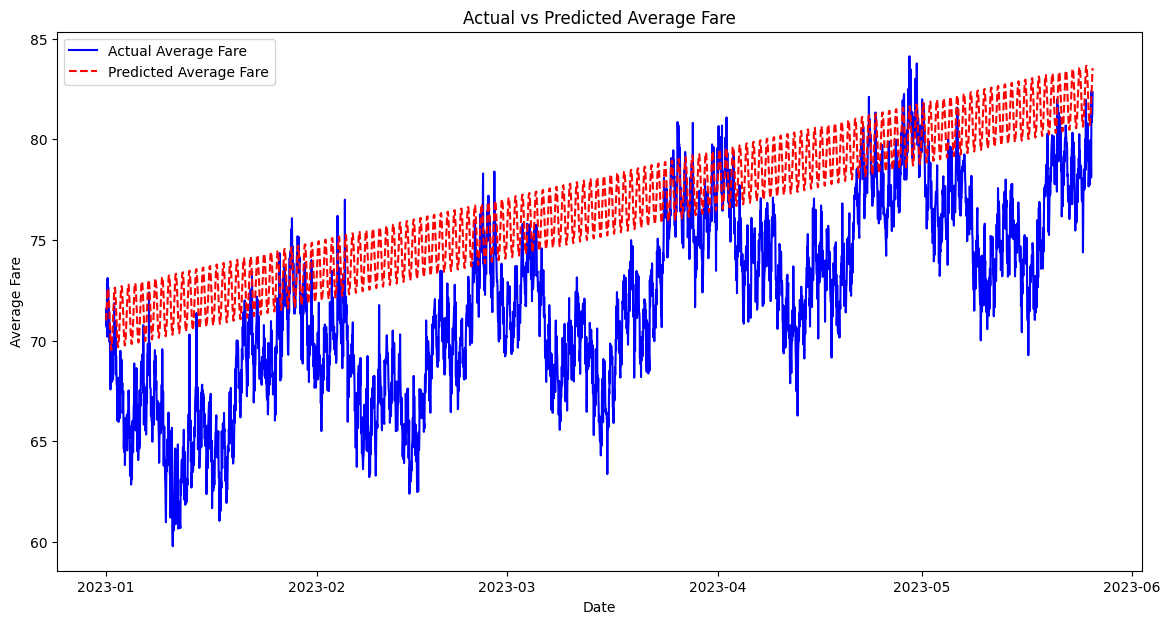

In [37]:
# Importing neccessary libraries
import matplotlib.pyplot as plt

# Time series comaparision between Actual and Predicted values for average fare over a specified date range    
plt.figure(figsize=(14, 7))
plt.plot(test_bike.index, By_true, label='Actual Average Fare', color='blue')
plt.plot(test_bike.index, By_pred, label='Predicted Average Fare', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Average Fare')
plt.title('Actual vs Predicted Average Fare')
plt.legend()
plt.show()

In [38]:
# Printing the details of the cartrain DataFrame

cartrain

,timestamp,average_fare,rides_completed,driver_availability,surge_multiplier,vehicle_type,weather,traffic_index,special_event
1,2021-01-01 00:00:00,90.000000,80,30.000000,1.0,car,Clear,53,0
4,2021-01-01 01:00:00,90.969805,98,30.000000,1.0,car,Clear,26,0
7,2021-01-01 02:00:00,91.781194,118,34.552558,1.0,car,Clear,21,0
10,2021-01-01 03:00:00,92.392849,95,30.866977,1.0,car,Clear,54,0
12,2021-01-01 04:00:00,93.697271,58,30.000000,1.2,car,Rainy,55,0
...,...,...,...,...,...,...,...,...,...
63002,2023-05-26 00:00:00,153.686305,28,30.000000,1.3,car,Clear,82,0
63003,2023-05-26 01:00:00,155.868476,55,30.000000,1.0,car,Clear,44,0
63008,2023-05-26 02:00:00,157.323043,52,30.000000,1.0,car,Clear,53,0
63011,2023-05-26 03:00:00,158.620295,18,30.000000,1.3,car,Cloudy,87,0


In [39]:
# Converting categorical values in the weather column of cartrain DataFrame to numerical values 
# Drops the weather and vehicle_type column as it's not needed 
# Converts the timestamp column in biketrain DataFrame to datetime format 
# and extracts hour from each timestamp, storing it in a new column called hour
le = LabelEncoder()
cartrain['weather_encoded'] = le.fit_transform(cartrain['weather'])
cartrain.drop(["weather", "vehicle_type"], axis=1, inplace=True)
cartrain['timestamp'] = pd.to_datetime(cartrain['timestamp'])
cartrain['hour'] = cartrain['timestamp'].dt.hour
cartrain['timestamp'] = pd.to_datetime(cartrain['timestamp'])

# Set timestamp as the index
cartrain.set_index('timestamp', inplace=True)

# Split the data
train_car = cartrain[cartrain.index < pd.to_datetime('2023-01-01')]
test_car = cartrain[cartrain.index >= pd.to_datetime('2023-01-01')]

In [40]:
# Define the SARIMA model
Cmodel = SARIMAX(train_car['average_fare'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))
Csarima_model = Cmodel.fit()

# Make predictions
Cy_pred = Csarima_model.predict(start=len(train_car), end=len(train_car) + len(test_car) - 1)
Cy_true = test_car['average_fare']

# Calculate sMAPE
Csmape = np.mean(np.abs(Cy_pred - Cy_true) / (np.abs(Cy_pred) + np.abs(Cy_true)))
print(f'sMAPE: {Csmape}')

sMAPE: 0.00844655321969972


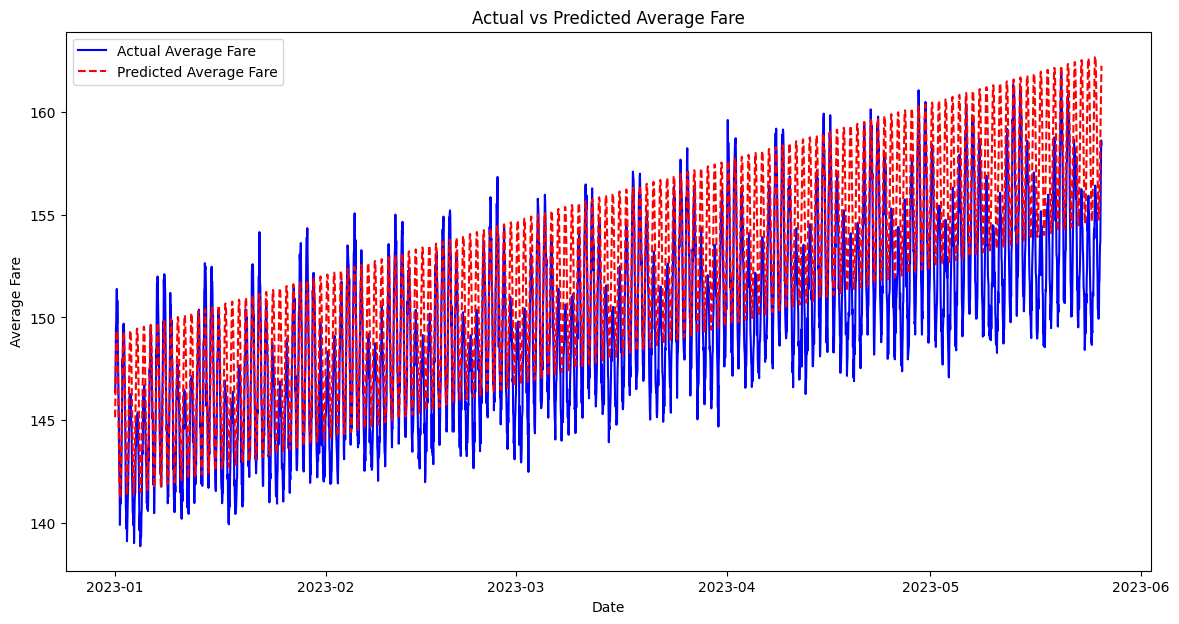

In [41]:
# Importing neccesary libraries
import matplotlib.pyplot as plt

# Time series comaparision between Actual and Predicted values for average fare over a specified date range 
plt.figure(figsize=(14, 7))
plt.plot(test_car.index, Cy_true, label='Actual Average Fare', color='blue')
plt.plot(test_car.index, Cy_pred, label='Predicted Average Fare', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Average Fare')
plt.title('Actual vs Predicted Average Fare')
plt.legend()
plt.show()

In [42]:
# Printing the contents of autotrain DataFrame

autotrain

,timestamp,average_fare,rides_completed,driver_availability,surge_multiplier,vehicle_type,weather,traffic_index,special_event
2,2021-01-01 00:00:00,41.197085,239,39.110219,1.0,auto,Clear,35,0
5,2021-01-01 01:00:00,40.703086,137,30.000000,1.3,auto,Clear,80,0
8,2021-01-01 02:00:00,42.637278,244,37.599326,1.4,auto,Clear,48,1
11,2021-01-01 03:00:00,43.544152,195,34.819591,1.0,auto,Cloudy,76,0
13,2021-01-01 04:00:00,43.836443,129,30.000000,1.2,auto,Rainy,55,0
...,...,...,...,...,...,...,...,...,...
63000,2023-05-26 00:00:00,42.645070,135,32.374646,1.2,auto,Stormy,41,0
63004,2023-05-26 01:00:00,46.028754,222,34.158151,1.0,auto,Clear,46,0
63006,2023-05-26 02:00:00,42.874589,149,30.000000,1.3,auto,Clear,86,0
63009,2023-05-26 03:00:00,41.013707,118,30.000000,1.2,auto,Rainy,68,0


In [43]:
# Converting the categorical data in weather column to numerical values 
# Dropping the weather and vehicle_type columns
# Converting the timestamp to datetime format

le = LabelEncoder()
autotrain['weather_encoded'] = le.fit_transform(autotrain['weather'])
autotrain.drop(["weather", "vehicle_type"], axis=1, inplace=True)
autotrain['timestamp'] = pd.to_datetime(autotrain['timestamp'])
autotrain['hour'] = autotrain['timestamp'].dt.hour
autotrain

,timestamp,average_fare,rides_completed,driver_availability,surge_multiplier,traffic_index,special_event,weather_encoded,hour
2,2021-01-01 00:00:00,41.197085,239,39.110219,1.0,35,0,0,0
5,2021-01-01 01:00:00,40.703086,137,30.000000,1.3,80,0,0,1
8,2021-01-01 02:00:00,42.637278,244,37.599326,1.4,48,1,0,2
11,2021-01-01 03:00:00,43.544152,195,34.819591,1.0,76,0,1,3
13,2021-01-01 04:00:00,43.836443,129,30.000000,1.2,55,0,2,4
...,...,...,...,...,...,...,...,...,...
63000,2023-05-26 00:00:00,42.645070,135,32.374646,1.2,41,0,3,0
63004,2023-05-26 01:00:00,46.028754,222,34.158151,1.0,46,0,0,1
63006,2023-05-26 02:00:00,42.874589,149,30.000000,1.3,86,0,0,2
63009,2023-05-26 03:00:00,41.013707,118,30.000000,1.2,68,0,2,3


In [44]:
autotrain['timestamp'] = pd.to_datetime(autotrain['timestamp'])

# Set timestamp as the index
autotrain.set_index('timestamp', inplace=True)

# Split the data
train_auto = autotrain[autotrain.index < pd.to_datetime('2023-01-01')]
test_auto = autotrain[autotrain.index >= pd.to_datetime('2023-01-01')]

In [45]:
# Define the SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX
Amodel = SARIMAX(train_auto['average_fare'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))
Asarima_model = Amodel.fit()

# Make predictions
Ay_pred = Asarima_model.predict(start=len(train_auto), end=len(train_auto) + len(test_auto) - 1)
Ay_true = test_auto['average_fare']

# Calculate sMAPE
Asmape = np.mean(np.abs(Ay_pred - Ay_true) / (np.abs(Ay_pred) + np.abs(Ay_true)))
print(f'sMAPE: {Asmape}')

sMAPE: 0.02170007800422037


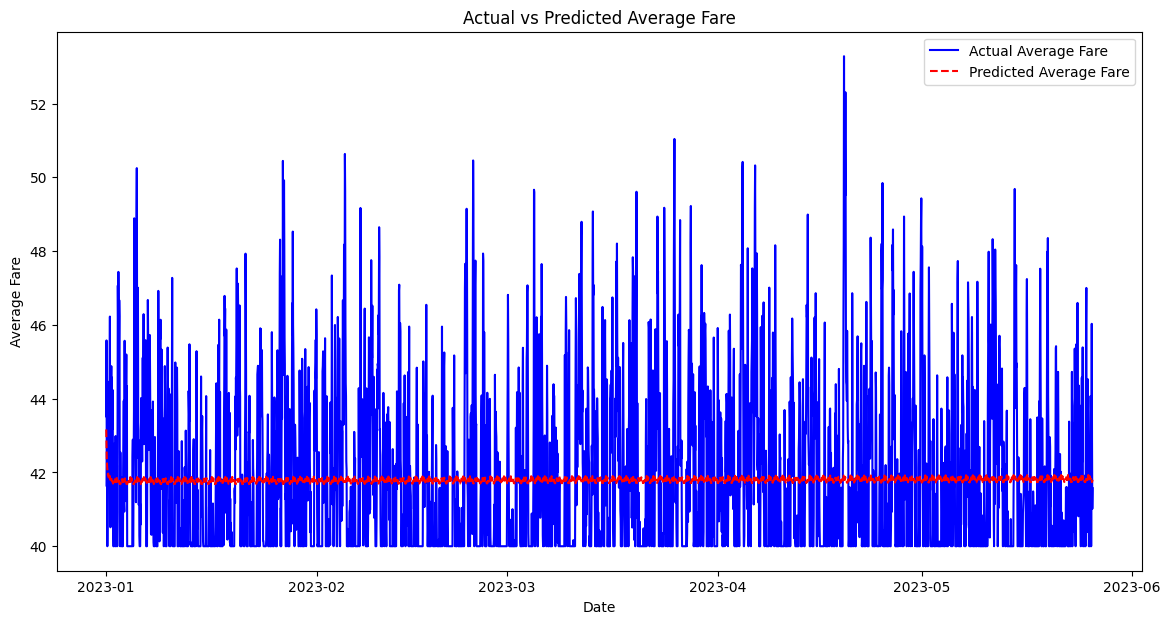

In [46]:
# Importing neccessary libraries
import matplotlib.pyplot as plt

# Time series comaparision between Actual and Predicted values for average fare over a specified date range 
plt.figure(figsize=(14, 7))
plt.plot(test_auto.index, Ay_true, label='Actual Average Fare', color='blue')
plt.plot(test_auto.index, Ay_pred, label='Predicted Average Fare', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Average Fare')
plt.title('Actual vs Predicted Average Fare')
plt.legend()
plt.show()

The SARIMA model was chosen due to its ability to capture both trends and seasonality in the data which makes it suitable for time series forecasting in a complex urban mobility context.  


Now if we perform feature engineering

In [44]:
# Creating 3 seperate DataFrames based on the vehicle_type column

bike_data = train[train['vehicle_type'] == 'bike'].copy()
auto_data = train[train['vehicle_type'] == 'auto'].copy()
car_data = train[train['vehicle_type'] == 'car'].copy()

In [45]:
# Performing Feature Engineering on the 3 DataFrames created above to add new features for improved analysis

import pandas as pd
import numpy as np

for df in [bike_data, auto_data, car_data]:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df.set_index('timestamp', inplace=True)

# Define the feature engineering function
def feature_engineering(df):
    # Lag Features
    df['lag_1'] = df['average_fare'].shift(1)
    df['lag_2'] = df['average_fare'].shift(2)
    df['lag_3'] = df['average_fare'].shift(3)

    # Rolling Statistics
    df['rolling_mean_3'] = df['average_fare'].rolling(window=3).mean()
    df['rolling_std_3'] = df['average_fare'].rolling(window=3).std()

    # Extract Time-Based Features from the index
    df['hour'] = df.index.hour  # Extracting hour directly from the timestamp
    df['day_of_week'] = df.index.dayofweek  # Monday=0, Sunday=6
    df['month'] = df.index.month

    # Interaction Features
    df['surge_traffic_interaction'] = df['surge_multiplier'] * df['traffic_index']

    # Cyclical Encoding
    df['hour_sin'] = np.sin(df['hour'] * (2. * np.pi / 24))
    df['hour_cos'] = np.cos(df['hour'] * (2. * np.pi / 24))

    # Encoding Weather
    df = pd.get_dummies(df, columns=['weather'], drop_first=True)

    # Dropping rows with NaN values created by lagging and rolling features
    df.dropna(inplace=True)

    return df

# Perform feature engineering on each vehicle type
bike_data = feature_engineering(bike_data)
auto_data = feature_engineering(auto_data)
car_data = feature_engineering(car_data)

# Display the updated DataFrame with new features for each vehicle type
print("Bike Data with Features:\n", bike_data.head())
print("Auto Data with Features:\n", auto_data.head())
print("Car Data with Features:\n", car_data.head())

Bike Data with Features:
                      average_fare  rides_completed  driver_availability  \
timestamp                                                                 
2021-01-01 03:00:00     22.984324              657            57.931034   
2021-01-01 04:00:00     21.901187              272            42.766917   
2021-01-01 05:00:00     22.160549              659            61.704671   
2021-01-01 06:00:00     23.755702             1000            78.842966   
2021-01-01 07:00:00     23.164910              946            60.973741   

                     surge_multiplier vehicle_type  traffic_index  \
timestamp                                                           
2021-01-01 03:00:00          1.000000         bike             29   
2021-01-01 04:00:00          1.300000         bike             97   
2021-01-01 05:00:00          1.300000         bike             88   
2021-01-01 06:00:00          1.300000         bike             81   
2021-01-01 07:00:00          1.912

Rationale behind feature engineering:  
We introduced lag features to provide the model with information about past fares that helps to capture the temporal data.  
We also included rolling statistics like rolling mean and rolling sd that helps smooth fluctuations and assesses the volatility in fares over time.  
Time based features like hour, day_of the week and month are critical as well to understand how fare prices varies at different times.  
We also did cyclical encoding to include features like hour cos and hour sin to capture the cyclical nature of hours in a day, enabling the model to recognize patterns that repeat daily.

In [47]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Define a function to get top features
def get_top_features(df, target='average_fare', top_n=3):
    # Drop vehicle_type if it still exists
    df = df.drop(columns=['vehicle_type'], errors='ignore')
    
    # Separate features and target
    X = df.drop(columns=[target])
    y = df[target]
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize and fit the model
    model = XGBRegressor(random_state=42, enable_categorical=True)  # Added enable_categorical
    model.fit(X_train, y_train)
    
    # Get feature importances
    feature_importances = model.feature_importances_
    features = X.columns
    
    # Create a DataFrame to sort and retrieve top features
    importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
    top_features = importance_df.nlargest(top_n, 'Importance')
    
    return top_features

# Get top features for each dataset
print("Top features for Bike Data:\n", get_top_features(bike_data))
print("\nTop features for Auto Data:\n", get_top_features(auto_data))
print("\nTop features for Car Data:\n", get_top_features(car_data))


Top features for Bike Data:
            Feature  Importance
8   rolling_mean_3    0.996398
15        hour_cos    0.000569
7            lag_3    0.000433

Top features for Auto Data:
           Feature  Importance
8  rolling_mean_3    0.659781
6           lag_2    0.149234
9   rolling_std_3    0.087550

Top features for Car Data:
            Feature  Importance
8   rolling_mean_3    0.996387
15        hour_cos    0.002091
10            hour    0.000375


the rolling mean 3 here indicates the average fare over 3 periods.  

So as we can see for the bike data after feature engineering and using XGBoost to train and find out the most influencial features.  
So for bike we got the rolling mean 3, hour_cos (which is hour of the day itself but just a cyclical encoding to capture cyclical nature of time) and the lag_3 which indicates fare from 3 periods ago.  

For auto we got again the rolling mean 3, lag 2 which indicates fare from 2 periods ago and rolling std 3 which is the 3 period rolling standard deviation which captures volatality in the fares.  

For car we got rolling mean 3 again , hour cos (definition above) and just hour which is direct representation of the hour of the day.

By continuously monitoring and forecasting fares based on the model's predictions, RideWave can adjust pricing in real-time, optimizing revenue while ensuring competitiveness.  
The fare structure might vary significantly among bikes, autos, and cars due to differing operational costs, demand patterns, and customer preferences. For example, bikes may have more fluctuations in fare due to their accessibility and flexibility, while autos may exhibit more stability during peak traffic.
By analyzing forecasted fares for each vehicle type, RideWave can tailor its marketing and operational strategies, enhancing service delivery based on predicted demand.

### Task 4: Ensemble Modeling and Pricing Strategy (1 mark)

- Based on your work from previous tasks, analyze the relationships between fares of different vehicle types in Quahog City.
- Develop 3 different sophisticated forecasting models **(one for each vehicle type)**, with appropriate feature engineering for each vehicle type.

You must use the following 3 models for your forecasting:

1. ARIMA / ARIMAX / SARIMA / SARIMAX
2. Any method of your choice
3.  Any method of your choice that is NOT in the following list: Holt Winter's, ARIMA, ARIMAX, SARIMA, SARIMAX
   


Here are some models you can consider:
1) ARCH (https://en.wikipedia.org/wiki/Autoregressive_conditional_heteroskedasticity)
2) GARCH (https://www.investopedia.com/terms/g/garch.asp)
3) VAR (https://en.wikipedia.org/wiki/Vector_autoregression#:~:text=VAR%20is%20a%20type%20of,economics%20and%20the%20natural%20sciences.)
4) XGBoost (https://en.wikipedia.org/wiki/XGBoost)

Explain the rationale behind your choice of model for the corresponding vehicle type.

RideWave are looking to create a unified model incorporating all 3 of the models you have developed.
- How would you go about implementing an ensemble modelling approach using all 3 models? 
##### (You don't have to write code for this, but the explanation must be detailed)





In [50]:
# Assigns existing DataFrames biketrain, autotrain and cartrain to variables 
# bike_data, auto_data and car_data

bike_data = biketrain
auto_data = autotrain
car_data = cartrain

In [51]:
# Importing neccessary libraries
from statsmodels.tsa.statespace.sarimax import SARIMAX

# SARIMAX for Bikes
bike_exog = bike_data[['traffic_index', 'special_event', 'weather_encoded', 'hour']]
sarimax_model = SARIMAX(bike_data['average_fare'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 24), exog=bike_exog)
sarimax_results = sarimax_model.fit()
bike_forecast = sarimax_results.predict(start=bike_data.index[-100], end=bike_data.index[-1], exog=bike_exog)

In [52]:
# Importing neccessary libraries
from sklearn.metrics import mean_absolute_percentage_error

# Get actual values for the same period as the forecast
actual_bike_values = bike_data['average_fare'].iloc[-100:]

# Calculate SMAPE
smape_bike = mean_absolute_percentage_error(actual_bike_values, bike_forecast) * 100
print(f'SMAPE for SARIMAX bike forecast: {smape_bike:.2f}%')

SMAPE for SARIMAX bike forecast: 0.80%


In [53]:
# Importing neccessary libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Prepare features and target for XGBoost
auto_features = auto_data[['rides_completed', 'driver_availability', 'surge_multiplier', 'traffic_index', 'special_event', 'weather_encoded', 'hour']]
X_train, X_val, y_train, y_val = train_test_split(auto_features, auto_data['average_fare'], test_size=0.2, shuffle=False)

# Training the xgb model
xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1)
xgb_model.fit(X_train, y_train)
auto_forecast = xgb_model.predict(X_val)

In [54]:
# Installing neccessary libraries
!pip install arch



[notice] A new release of pip is available: 24.2 -> 24.3.1

[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
from statsmodels.tsa.api import VAR
data = car_data[['average_fare', 'rides_completed', 'driver_availability', 'traffic_index', 'surge_multiplier', 'special_event', 'weather_encoded']]
data_diff = data.diff().dropna()  # Differencing to ensure stationarity

# 2. Train VAR Model
# Fit a VAR model on the differenced data
var_model = VAR(data_diff)
var_fit = var_model.fit(maxlags=15, ic='aic')  # Choosing optimal lag based on AIC

# 3. Forecasting
# Forecast the next 100 steps
forecast_steps = 100
var_forecast = var_fit.forecast(data_diff.values[-var_fit.k_ar:], steps=forecast_steps)

# Inverse transform the differencing to get back to original values
var_forecast_cumulative = data.values[-1] + np.cumsum(var_forecast, axis=0)
car_forecast_values = var_forecast_cumulative[:, 0]  # Extract the 'average_fare' forecast


In [56]:
# Printing neccesary details of the forecasts

print(bike_forecast)
print(car_forecast_values)
print(len(auto_forecast))

2023-05-22 01:00:00    79.459674

2023-05-22 02:00:00    79.750914

2023-05-22 03:00:00    79.973895

2023-05-22 04:00:00    80.145728

2023-05-22 05:00:00    80.402827

                         ...    

2023-05-26 00:00:00    79.884539

2023-05-26 01:00:00    80.713261

2023-05-26 02:00:00    81.253633

2023-05-26 03:00:00    81.445110

2023-05-26 04:00:00    81.786707

Freq: h, Name: predicted_mean, Length: 100, dtype: float64

[158.77920952 158.83690176 158.45915659 157.98508349 157.13365327

 156.19354974 155.14829793 154.03758257 152.90097967 151.88611676

 151.013746   150.42205617 150.24811665 150.33528911 150.65561133

 151.14744704 151.9234986  152.88601027 153.94383533 155.04843864

 156.09845232 157.04155951 157.8141845  158.3569041  158.63046747

 158.60726799 158.29934317 157.74663645 156.98642707 156.05541734

 155.01774796 153.95053728 152.94043426 152.05303451 151.343888

 150.85840155 150.62701599 150.66692159 150.97338351 151.5207075

 152.26991956 153.17045257 154.16

ENSEMBLE MODELLING

To create a unified ensemble model with the three forecasts, we can combine each model’s predictions to create a final, more reliable forecast. Here’s a simpler breakdown of the approach:

1. Train Each Model Separately:

First, we train each model (e.g., XGBoost, VAR and SARIMAX) individually on the fare data for its respective vehicle type. Each model will bring its own strengths, allowing us to capture different aspects of the fare trends.

2. Generate Predictions:

Each model then predicts fares for the same future dates. This will give us three separate sets of predictions, one from each model, for every time period we want to forecast.

3. Combine the Predictions:

Weighted Average: Assign a weight to each model based on how accurate it is (for example, using Mean Absolute Error or MAE). Models that perform better on test data get higher weights, so their forecasts contribute more to the final prediction.
Stacking: Use the predictions from each model as inputs to a new, “meta” model (like a simple linear regression). This meta-model learns how best to combine the three predictions to get the final forecast.

4. Optimize the Ensemble:

To get the best accuracy, test different weights or adjust the meta-model on a separate test set. Evaluate using metrics like MAE or RMSE and fine-tune as needed.

5. Forecast:

Once tuned, use the ensemble model to predict fares for unseen data. This approach helps produce more reliable forecasts by combining the unique insights each model provides.

## Example submission, just for your reference

In [51]:
# submission = pd.DataFrame()
# sample_submission = pd.read_csv('/kaggle/input/data-analytics-ue-22-cs-342-aa-2-hackathon-2/sample_submission.csv')


## We have used a sample-submission just to show you the format your submission should be in, you have to use your OWN forecasts while making submissions


In [52]:
# submission['timestamp'] = sample_submission['timestamp']
# submission['average_fare_bike'] = sample_submission['average_fare_bike']
# submission['average_fare_auto'] = sample_submission['average_fare_auto']
# submission['average_fare_car'] = sample_submission['average_fare_car']

**PREDICTIONS**

In [53]:
# test=pd.read_csv("/kaggle/input/data-analytics-ue-22-cs-342-aa-2-hackathon-2/test.csv")
# test

In [57]:
# Creating test DataFrames for each vehicle type

biketest = test[test['vehicle_type'] == 'bike']
cartest = test[test['vehicle_type'] == 'car']
autotest = test[test['vehicle_type'] == 'auto']

In [58]:
# Bby_pred = Bsarima_model.predict(start=len(biketrain), end=len(biketrain) + len(biketest) - 1)
# print(Bby_pred)


import pandas as pd

# Replicate the last row to match the length of biketest
last_row = bike_exog.iloc[-1].values.reshape(1, -1)
bike_exog_test = pd.DataFrame([last_row[0]] * len(biketest), columns=bike_exog.columns)

# Predict using SARIMAX with the extended exogenous data
Bby_pred = sarimax_results.predict(start=len(biketrain), 
                                   end=len(biketrain) + len(biketest) - 1, 
                                   exog=bike_exog_test)
print(Bby_pred)


b = pd.DataFrame(Bby_pred)
b


2023-05-26 05:00:00    82.006012

2023-05-26 06:00:00    81.998768

2023-05-26 07:00:00    81.942299

2023-05-26 08:00:00    81.801194

2023-05-26 09:00:00    81.587174

                         ...    

2023-12-30 20:00:00    95.841783

2023-12-30 21:00:00    96.026418

2023-12-30 22:00:00    96.379551

2023-12-30 23:00:00    96.707708

2023-12-31 00:00:00    97.121547

Freq: h, Name: predicted_mean, Length: 5252, dtype: float64


,predicted_mean
2023-05-26 05:00:00,82.006012
2023-05-26 06:00:00,81.998768
2023-05-26 07:00:00,81.942299
2023-05-26 08:00:00,81.801194
2023-05-26 09:00:00,81.587174
...,...
2023-12-30 20:00:00,95.841783
2023-12-30 21:00:00,96.026418
2023-12-30 22:00:00,96.379551
2023-12-30 23:00:00,96.707708


In [59]:
# Printing the details of the cartest DataFrame

cartest

,timestamp,rides_completed,driver_availability,surge_multiplier,vehicle_type,weather,traffic_index,special_event
0,2023-05-26 05:00:00,10,30.000000,1.300000,car,Cloudy,99,0
3,2023-05-26 06:00:00,81,31.053947,1.000000,car,Cloudy,77,0
6,2023-05-26 07:00:00,204,41.554166,1.315815,car,Clear,25,0
11,2023-05-26 08:00:00,91,30.573033,1.690012,car,Stormy,52,0
13,2023-05-26 09:00:00,186,65.130976,1.409150,car,Clear,38,0
...,...,...,...,...,...,...,...,...
15742,2023-12-30 20:00:00,107,40.930857,1.000000,car,Clear,51,0
15745,2023-12-30 21:00:00,103,43.765909,1.000000,car,Clear,47,0
15748,2023-12-30 22:00:00,111,30.000000,1.400000,car,Clear,44,1
15750,2023-12-30 23:00:00,128,36.043657,1.000000,car,Clear,47,0


In [60]:
# Ccy_pred = Csarima_model.predict(start=len(cartrain), end=len(cartrain) + len(cartest) - 1)
# print(Ccy_pred)
# c = pd.DataFrame(Ccy_pred)


import numpy as np
import pandas as pd

# Assuming the number of forecast steps is based on the test data length
forecast_steps = len(cartest)

# Forecast using the last observed values from the differenced training data
var_forecast_diff = var_fit.forecast(y=data_diff.values[-var_fit.k_ar:], steps=forecast_steps)

# Inverse the differencing to get back to the original scale
last_observed_values = cartrain.iloc[-1][['average_fare', 'rides_completed', 'driver_availability', 'traffic_index', 'surge_multiplier', 'special_event', 'weather_encoded']].values

# Initialize an array to store the cumulative forecast values
var_forecast = np.zeros((forecast_steps, var_forecast_diff.shape[1]))

# Compute the first forecast using the last observed values and the first differenced forecast
var_forecast[0] = last_observed_values + var_forecast_diff[0]

# Iterate to compute the cumulative sum for each subsequent forecast
for i in range(1, forecast_steps):
    var_forecast[i] = var_forecast[i - 1] + var_forecast_diff[i]

# Extract the forecasted column for 'average_fare' (assuming it's the first column)
car_forecast_values = var_forecast[:, 0]

# Create a new DataFrame with the forecast values and the existing timestamp index from cartest
c = pd.DataFrame(car_forecast_values, index=cartest.index, columns=['average_fare_forecast'])

# Display the DataFrame in the desired format
print(c)


       average_fare_forecast

0                 158.779210

3                 158.836902

6                 158.459157

11                157.985083

13                157.133653

...                      ...

15742             170.209180

15745             170.212183

15748             170.215186

15750             170.218188

15755             170.221191



[5252 rows x 1 columns]


In [61]:
# Printing the details of the autotest DataFrame

autotest

,timestamp,rides_completed,driver_availability,surge_multiplier,vehicle_type,weather,traffic_index,special_event
2,2023-05-26 05:00:00,341,38.421681,1.200000,auto,Rainy,62,0
5,2023-05-26 06:00:00,365,43.844561,1.300000,auto,Cloudy,84,0
7,2023-05-26 07:00:00,473,40.429137,1.615815,auto,Clear,84,0
10,2023-05-26 08:00:00,497,49.413044,1.490012,auto,Clear,69,0
12,2023-05-26 09:00:00,785,80.562435,1.409150,auto,Clear,41,0
...,...,...,...,...,...,...,...,...
15741,2023-12-30 20:00:00,381,47.584727,1.000000,auto,Clear,75,0
15744,2023-12-30 21:00:00,479,61.560669,1.000000,auto,Clear,30,0
15747,2023-12-30 22:00:00,508,41.556060,1.000000,auto,Cloudy,26,0
15752,2023-12-30 23:00:00,496,42.860858,1.000000,auto,Clear,69,0


In [62]:
# Aay_pred = Asarima_model.predict(start=len(autotrain), end=len(autotrain) + len(autotest) - 1)
# print(Aay_pred)
# a = pd.DataFrame(Aay_pred)
# a
import pandas as pd

# Assuming autotest DataFrame is defined as shown before
# Convert timestamp to datetime if it's not already
autotest['timestamp'] = pd.to_datetime(autotest['timestamp'])

# Extract hour from timestamp
autotest['hour'] = autotest['timestamp'].dt.hour

# Encode the 'weather' column if it's not encoded
weather_mapping = {'Clear': 0, 'Cloudy': 1, 'Rainy': 2, 'Stormy': 3}  # Example mapping, adjust as necessary
autotest['weather_encoded'] = autotest['weather'].map(weather_mapping)

# Now select the required columns for prediction
X_test = autotest[['rides_completed', 'driver_availability', 'surge_multiplier', 'traffic_index', 'special_event', 'weather_encoded', 'hour']]

# Predicting using the trained XGBoost model
predictions = xgb_model.predict(X_test)

# Add predictions to the autotest DataFrame
autotest['predicted_fare'] = predictions

# Display the results
a = pd.DataFrame(autotest[['timestamp', 'predicted_fare']])
print(a)



                timestamp  predicted_fare

2     2023-05-26 05:00:00       41.618626

5     2023-05-26 06:00:00       41.790485

7     2023-05-26 07:00:00       40.307743

10    2023-05-26 08:00:00       41.402260

12    2023-05-26 09:00:00       41.481075

...                   ...             ...

15741 2023-12-30 20:00:00       42.714825

15744 2023-12-30 21:00:00       43.707188

15747 2023-12-30 22:00:00       40.772400

15752 2023-12-30 23:00:00       40.964413

15753 2023-12-31 00:00:00       40.880989



[5252 rows x 2 columns]


In [63]:
b

,predicted_mean
2023-05-26 05:00:00,82.006012
2023-05-26 06:00:00,81.998768
2023-05-26 07:00:00,81.942299
2023-05-26 08:00:00,81.801194
2023-05-26 09:00:00,81.587174
...,...
2023-12-30 20:00:00,95.841783
2023-12-30 21:00:00,96.026418
2023-12-30 22:00:00,96.379551
2023-12-30 23:00:00,96.707708


In [64]:
submission = pd.DataFrame()
submission['timestamp'] = test[test['vehicle_type'] == 'bike']['timestamp'].reset_index(drop=True)
submission['average_fare_bike'] = b['predicted_mean'].reset_index(drop=True)
submission['average_fare_auto'] = a['predicted_fare'].reset_index(drop=True)
submission['average_fare_car'] = c['average_fare_forecast'].reset_index(drop=True)

submission


,timestamp,average_fare_bike,average_fare_auto,average_fare_car
0,2023-05-26 05:00:00,82.006012,41.618626,158.779210
1,2023-05-26 06:00:00,81.998768,41.790485,158.836902
2,2023-05-26 07:00:00,81.942299,40.307743,158.459157
3,2023-05-26 08:00:00,81.801194,41.402260,157.985083
4,2023-05-26 09:00:00,81.587174,41.481075,157.133653
...,...,...,...,...
5247,2023-12-30 20:00:00,95.841783,42.714825,170.209180
5248,2023-12-30 21:00:00,96.026418,43.707188,170.212183
5249,2023-12-30 22:00:00,96.379551,40.772400,170.215186
5250,2023-12-30 23:00:00,96.707708,40.964413,170.218188


In [65]:
submission.to_csv('submission.csv', index = False)
print("Submission file is created")

Submission file is created


So we have used SARIMAX for bikes, var for cars and XgBoost for autos.  

As we have seen before bikes have a more seasonal demand pattern and it is influenced by other factors as well like time of day, weather and event. The fare data can exhibit trends and seasonality, which makes time series models appropriate. So we have included exogeneous variables as well like weather and traffic index and special event. The ability to include this helps enhance the model's predictive power by accounting for external influences on bike demand.  

Cars have a more complex relation between various factors like other vehicle types, time, driver availability, and economic conditions. The Vector Autoregression (VAR) model captures the linear interdependencies among multiple time series. By considering multiple time series together VAR leads to more accurate predictions.

Autos also are influenced by various other factors like rides completed, driver availability, surge multipliers, and external factors like weather and traffic. Traditional time series models might struggle with this hence we used XgBoost for this. It provides insights into feature importance, allowing for better understanding and interpretation of which factors are most influential in fare predictions. So it can be valuable in decision making.

## Congratulations! 🎉

You've done it! You've successfully completed the Data Analytics (UE22CS342AA2) Hackathon-2, and that's something to be truly proud of! This achievement shows just how much you've grown in your ability to tackle time-series modeling and analysis.

### Here’s what you’ve accomplished:
- You applied data analytics concepts to solve real-world problems.
- You developed time-series models, a skill that’s essential in fields like finance (think stock predictions) and healthcare (monitoring vitals)—and many more!

### What's next:
With this experience, you’ve laid a solid foundation for real-world data modeling and time-series analysis. The techniques you’ve mastered here will be incredibly valuable in many data science and machine learning projects, no matter the industry.

But remember, this is just the start of your journey in data science! Keep learning, keep pushing yourself, and most importantly, keep having fun with it. You're ready for even more exciting and challenging projects.

**Huge congrats once again, and wishing you all the best for your ISAs and ESAs! You've got this! 🌟** 